Напишите класс Ignorance для трансформации изображения. Экземпляр класса при инициализации принимает имя файла с изображением. 

Класс реализует методы:

1. equality() — выравнивание пикселей: находится модуль наибольшей разности трёх компонент данного пикселя и из синей компоненты вычитается треть этой разности, а к остальным она добавляется; 
2. Все числа округляются до целого вниз; метод возвращает изменённое изображение;
3. evil(width) — принимает ширину вырезаемой части; вырезает полосу во всю высоту изображения с левого края изображения, разрезает на четыре части, переставляет эти части так, чтобы сверху шли две средние части в исходном порядке, затем самая верхняя, самая нижняя остаётся на своём месте, возвращает полученное изображение;
4. save() — сохранение в файл — принимает объект изображения для сохранения и имя файла, с которым его нужно сохранить.

In [5]:
from PIL import Image


class Ignorance:
    def __init__(self, filename):
        self.image = Image.open(filename).convert("RGB")
        

    def equality(self):
        pixels = self.image.load()
        w, h = self.image.size

        for y in range(h):
            for x in range(w):
                r, g, b = pixels[x, y]
                diff = max(r, g, b) - min(r, g, b)
                d = diff // 3
                
                r = max(0, min(255, r + d))
                g = max(0, min(255, g + d))
                b = max(0, min(255, b - d))
                
                pixels[x, y] = (r, g, b)

        return self.image
    

    def evil(self, width):
        w, h = self.image.size
        stripe = self.image.crop((0, 0, width, h))

        part_h = h // 4
        
        top = stripe.crop((0, 0, width, part_h))
        mid1 = stripe.crop((0, part_h, width, 2 * part_h))
        mid2 = stripe.crop((0, 2 * part_h, width, 3 * part_h))
        bottom = stripe.crop((0, 3 * part_h, width, h))

        new_stripe = Image.new("RGB", (width, h))
        new_stripe.paste(mid1, (0, 0))
        new_stripe.paste(mid2, (0, part_h))
        new_stripe.paste(top, (0, 2 * part_h))
        new_stripe.paste(bottom, (0, 3 * part_h))

        new_img = self.image.copy()
        new_img.paste(new_stripe, (0, 0))
        
        return new_img
    

    def save(self, image, filename):
        image.save(filename)

Example 1

In [ ]:
ign = Ignorance('image.png')
ign.save(ign.evil(400), 'result.png')

Original image

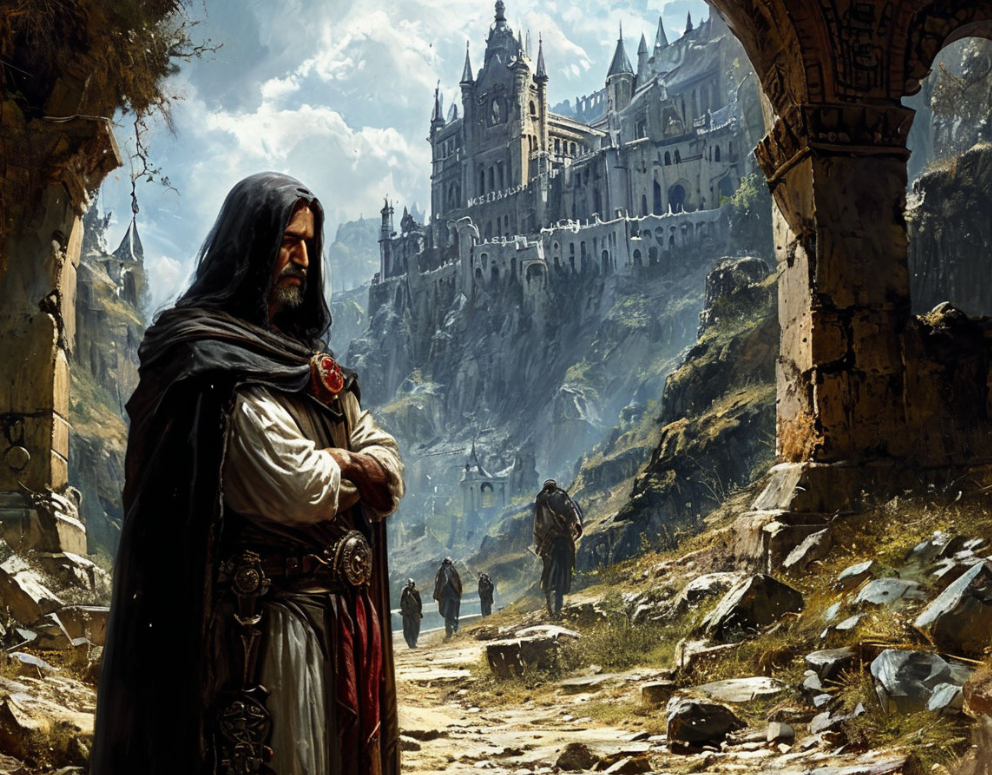

Output image

